In [1]:
from __future__ import print_function

import argparse
import csv
import os
import sys
import tifffile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import roc_curve
import glob
import pickle
from pathlib import Path
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as offline
offline.init_notebook_mode(connected = True)

In [2]:
CNN_output_dir = Path('./checkpoints/CBNA/CNN/')
MLP_output_dir = Path('./checkpoints/CBNA/MLP/')

targets = torch.load(CNN_output_dir.joinpath('CNN_train_predictions.pth'))['targets']
CNN_predictions = torch.load(CNN_output_dir.joinpath('CNN_train_predictions.pth'))['predictions']
MLP_predictions = torch.load(MLP_output_dir.joinpath('MLP_train_predictions.pth'))['predictions']

In [8]:
def get_thresholds(predictions, targets):
    threshold_list = []
    fpr_list = []
    tpr_list = []
    ix_list = []
    for i in range(targets.shape[-1]):
        fpr, tpr, thresholds = roc_curve(targets[:,i].numpy(), predictions[:,i].numpy())
        J = tpr - fpr
        ix = np.argmax(J)
        
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        ix_list.append(ix)
        threshold_list.append(thresholds[ix])
    return fpr_list, tpr_list, ix_list, threshold_list

In [9]:
fpr_CNN, tpr_CNN, ix_CNN, thresholds_CNN = get_thresholds(CNN_predictions, targets)

optimal threshold =  0.50643945


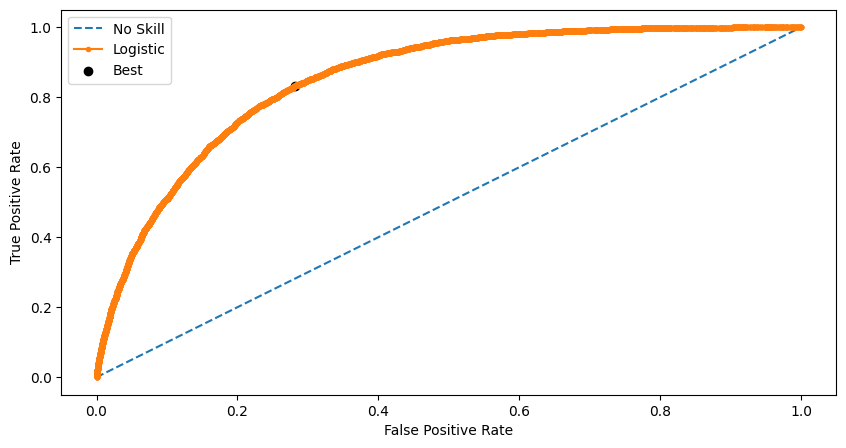

In [21]:
idx_cls = 21
fpr = fpr_CNN[idx_cls]
tpr = tpr_CNN[idx_cls]
ix = ix_CNN[idx_cls]

print('optimal threshold = ', thresholds_CNN[idx_cls])
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='Logistic') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [23]:
fpr_MLP, tpr_MLP, ix_MLP, thresholds_MLP = get_thresholds(MLP_predictions, targets)

optimal threshold =  0.51250386


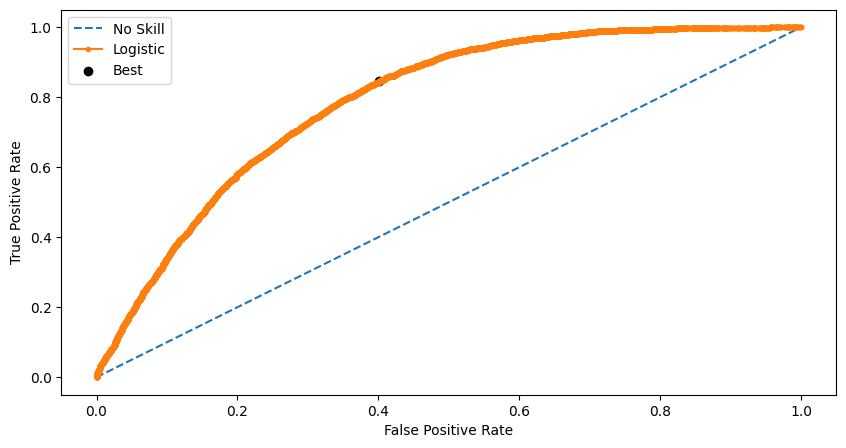

In [24]:
idx_cls = 21
fpr = fpr_MLP[idx_cls]
tpr = tpr_MLP[idx_cls]
ix = ix_MLP[idx_cls]

print('optimal threshold = ', thresholds_MLP[idx_cls])
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='Logistic') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()